In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io.arff import loadarff
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# rawData = arff.loadarff('')
# rawData = loadarff()
data = pd.read_csv('datasets/chronic_kidney_disease.csv')
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,ckd
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,1


<AxesSubplot:>

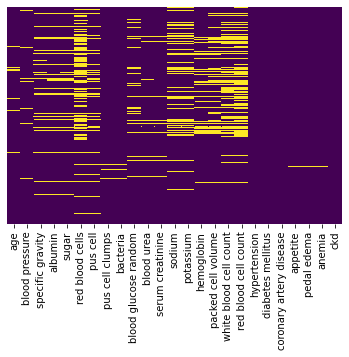

In [3]:
sb.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [4]:
# sb.set_style("whitegrid")
# sb.countplot(x="class", data=data)

In [5]:
data['red blood cells'] = pd.get_dummies(data['red blood cells'], drop_first=True)
data['pus cell'] = pd.get_dummies(data['pus cell'], drop_first=True)
data['pus cell clumps'] = pd.get_dummies(data['pus cell clumps'], drop_first=True)
data['bacteria'] = pd.get_dummies(data['bacteria'], drop_first=True)
data['hypertension'] = pd.get_dummies(data['hypertension'], drop_first=True)
data['diabetes mellitus'] = pd.get_dummies(data['diabetes mellitus'], drop_first=True)
data['coronary artery disease'] = pd.get_dummies(data['coronary artery disease'], drop_first=True)
data['appetite'] = pd.get_dummies(data['appetite'], drop_first=True)
data['pedal edema'] = pd.get_dummies(data['pedal edema'], drop_first=True)
data['anemia'] = pd.get_dummies(data['anemia'], drop_first=True)
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,ckd
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [6]:
import math
import numbers
# from pandas.api.types import is_numeric_dtype
# data.dropna(axis = 1, thresh=math.ceil(0.70 * data.shape[0])) #keep column if 50% data exists

for col in data.columns:
    # print(col, end=" ")
    # print(data[col].mean())
    data[col] = data[col].fillna(value=data[col].mean())

In [7]:
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,ckd
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000,0,0,0,0,0,0,1


In [8]:
data.describe()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,ckd
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.50250,0.647500,0.105000,0.055000,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.625000
std,16.974966,13.476298,0.005369,1.272318,1.029487,0.50062,0.478347,0.306937,0.228266,74.782634,49.285887,5.617490,9.204273,2.819783,2.716171,8.151081,2523.219976,0.840314,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.875000,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,78.234536,1.017408,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,126.000000,44.000000,1.400000,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.000000,0.450142,1.00000,1.000000,0.000000,0.000000,150.000000,61.750000,3.072454,141.000000,4.800000,14.625000,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.00000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# sb.pairplot(data)

<AxesSubplot:>

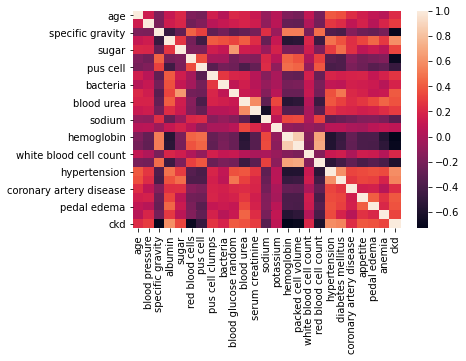

In [10]:
sb.heatmap(data.corr())

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = data.drop('ckd', axis = 1)
y = data['ckd']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

Decision tree


In [14]:
from sklearn.tree import DecisionTreeClassifier


In [23]:
dTree = DecisionTreeClassifier()
dTree.fit(x_train, y_train)

DecisionTreeClassifier()

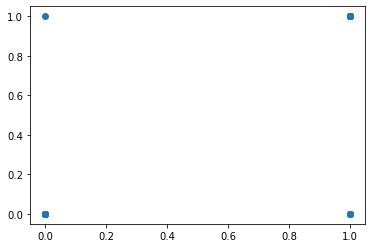

In [24]:
predictions = dTree.predict(x_test)
plt.scatter(y_test, predictions)

<AxesSubplot:xlabel='ckd'>

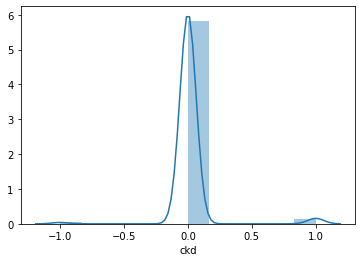

In [25]:
sb.distplot(y_test-predictions)

In [26]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
metrics.mean_absolute_error(y_test, predictions)

0.03125

In [28]:
metrics.mean_squared_error(y_test, predictions)

0.03125

In [29]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.93      0.98      0.95        54\n           1       0.99      0.96      0.98       106\n\n    accuracy                           0.97       160\n   macro avg       0.96      0.97      0.97       160\nweighted avg       0.97      0.97      0.97       160\n'

In [30]:
confusion_matrix(y_test, predictions)

array([[ 53,   1],
       [  4, 102]], dtype=int64)

answer, predicted
[no, no] = 53
[no, yes] = 1
[yes, no] = 4
[yes, yes] = 102